# PROBLEM SET : 1

## CLUSTERING

### A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summerizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data1 = pd.read_csv("bank_marketing_part1_Data.csv")

In [3]:
data1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


### EDA

In [4]:
data1.shape

(210, 7)

In [5]:
data1.size

1470

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
spending                        210 non-null float64
advance_payments                210 non-null float64
probability_of_full_payment     210 non-null float64
current_balance                 210 non-null float64
credit_limit                    210 non-null float64
min_payment_amt                 210 non-null float64
max_spent_in_single_shopping    210 non-null float64
dtypes: float64(7)
memory usage: 11.6 KB


In [7]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


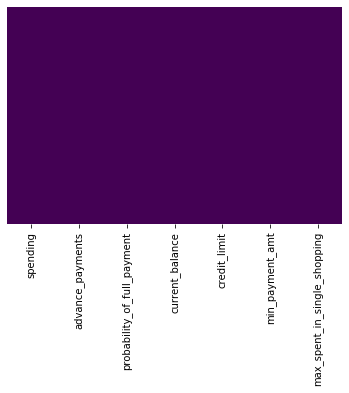

In [8]:
sns.heatmap(data1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
dups=data1.duplicated()

In [10]:
dups.sum()

0

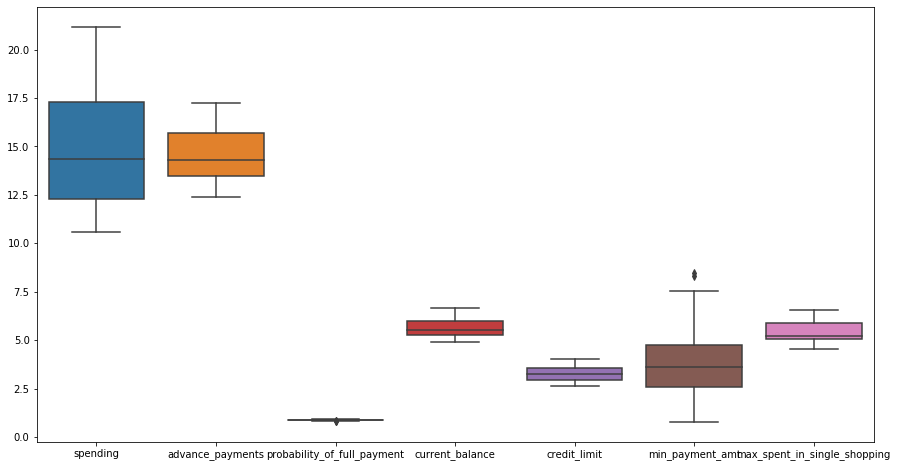

In [11]:
plt.figure(figsize=(15,8)) 
sns.boxplot(data=data1)

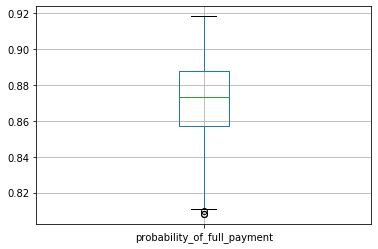

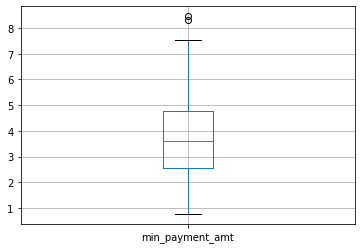

In [12]:
for col in ['probability_of_full_payment','min_payment_amt']:
    data1.boxplot(column=[col])
    plt.show()

In [13]:
def treat_outliers(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range,upper_range

In [14]:
for col in ['probability_of_full_payment','min_payment_amt']:
    least,maximum=treat_outliers(data1[col])
    data1[col]=np.where(data1[col]<least,least,data1[col])
    data1[col]=np.where(data1[col]>maximum,maximum,data1[col])

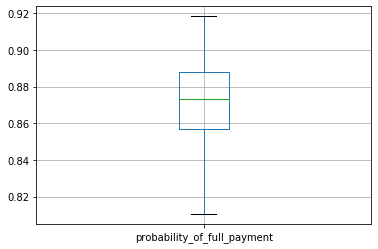

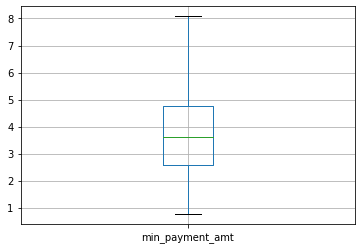

In [15]:
for col in ['probability_of_full_payment','min_payment_amt']:
    data1.boxplot(column=[col])
    plt.show()

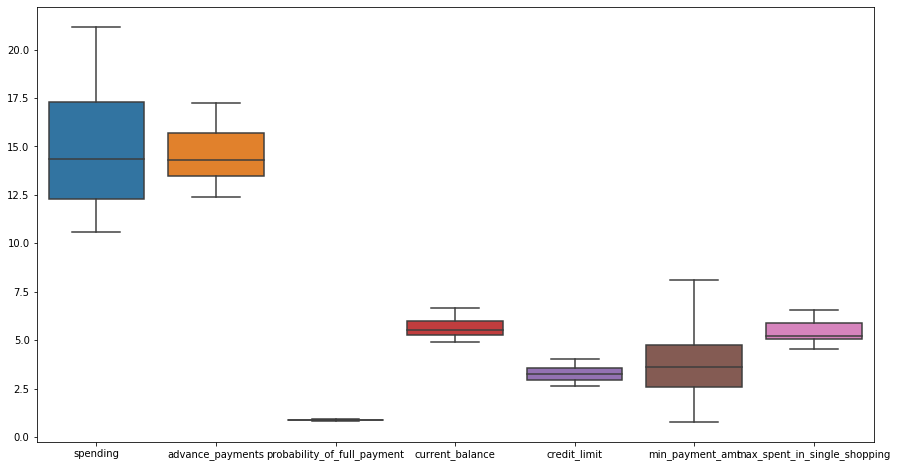

In [16]:
plt.figure(figsize=(15,8)) 
sns.boxplot(data=data1)

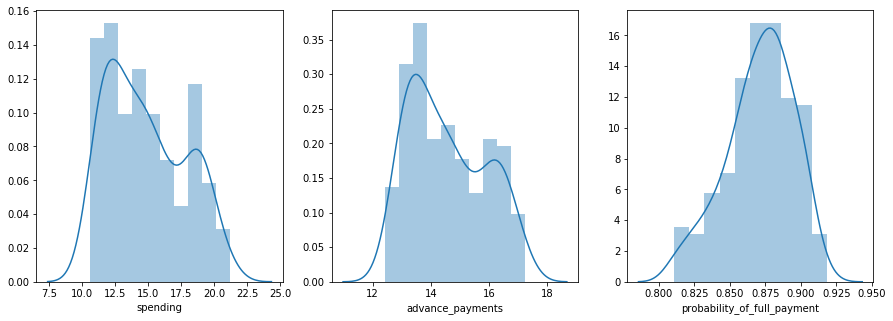

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.distplot(data1.spending,bins=10)
plt.subplot(1,3,2)
sns.distplot(data1.advance_payments,bins=10)
plt.subplot(1,3,3)
sns.distplot(data1.probability_of_full_payment,bins=10)

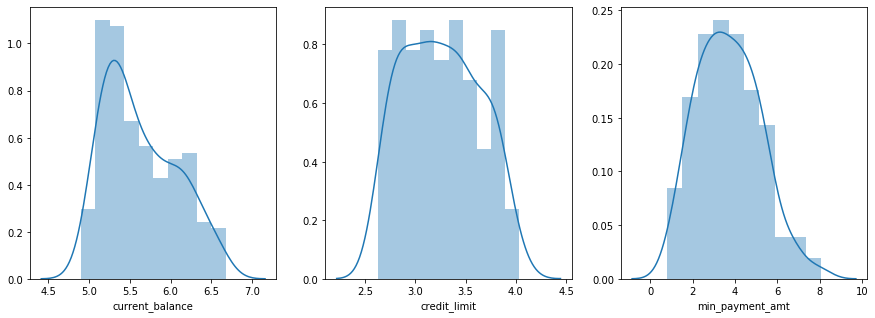

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.distplot(data1.current_balance,bins=10)
plt.subplot(1,3,2)
sns.distplot(data1.credit_limit,bins=10)
plt.subplot(1,3,3)
sns.distplot(data1.min_payment_amt,bins=10)

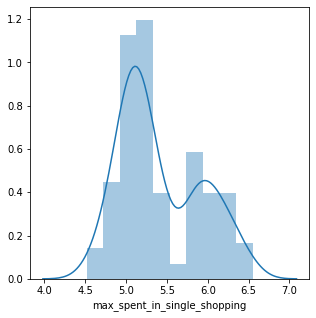

In [19]:
plt.figure(figsize=(5,5))
sns.distplot(data1.max_spent_in_single_shopping,bins=10)

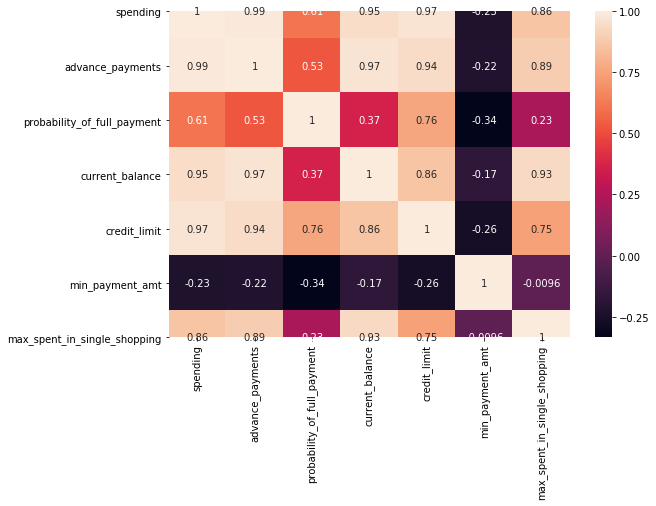

In [20]:
plt.figure(figsize=(9,6))
sns.heatmap(data1.corr(),annot=True)

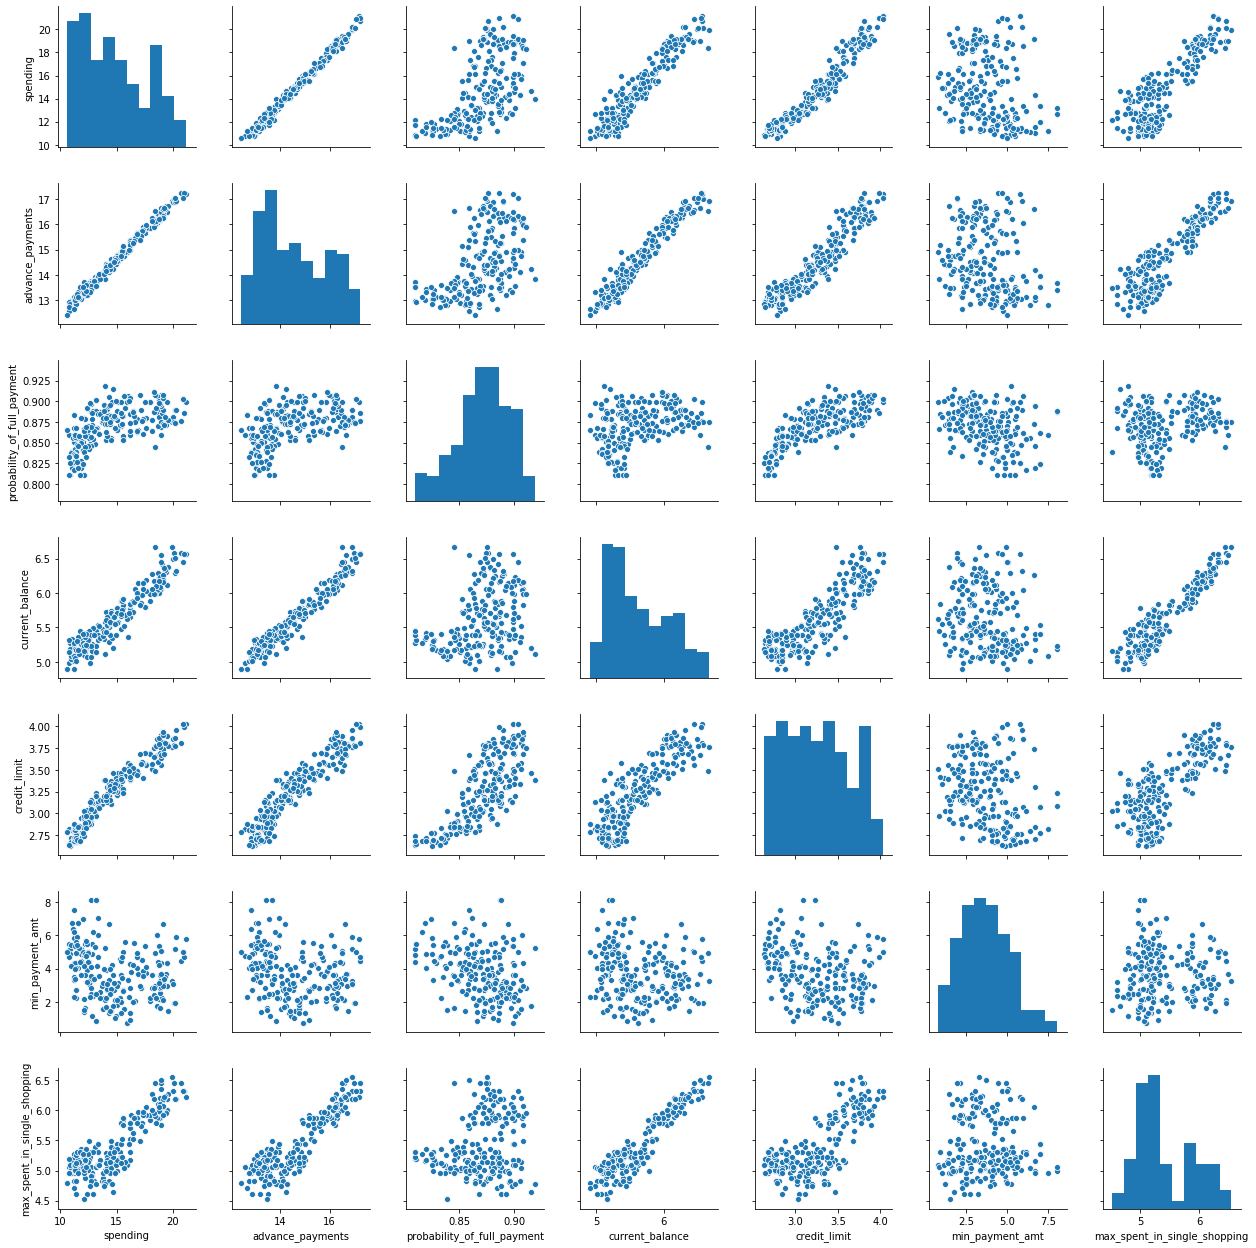

In [21]:
sns.pairplot(data1)

### Scaling

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
x = StandardScaler()

In [24]:
for col in ['spending','advance_payments','probability_of_full_payment','current_balance','credit_limit',
           'min_payment_amt','max_spent_in_single_shopping']:
    data1[col]=x.fit_transform(data1[[col]])  

In [25]:
data1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813


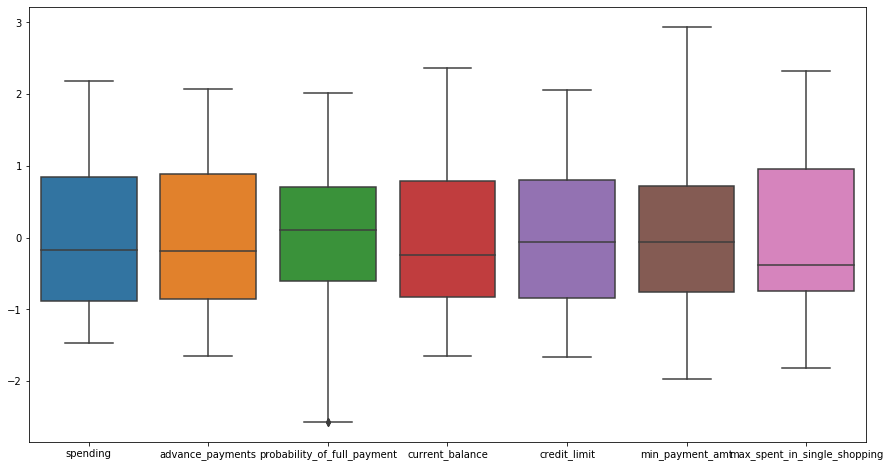

In [26]:
plt.figure(figsize=(15,8)) 
sns.boxplot(data=data1,orient='v')

In [27]:
min_val,max_val=treat_outliers(data1['probability_of_full_payment'])

In [28]:
data1['probability_of_full_payment']=np.where(data1['probability_of_full_payment']>max_val,max_val,
                                              data1['probability_of_full_payment'])
data1['probability_of_full_payment']=np.where(data1['probability_of_full_payment']<min_val,min_val,
                                              data1['probability_of_full_payment'])

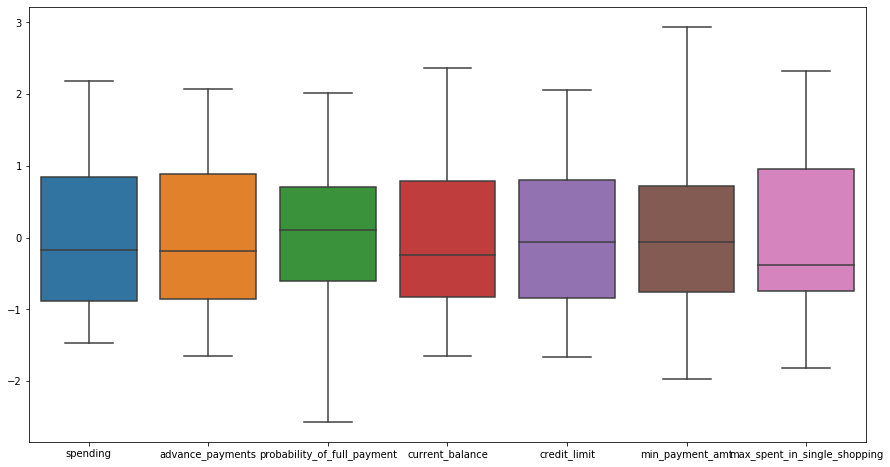

In [29]:
plt.figure(figsize=(15,8)) 
sns.boxplot(data=data1,orient='v')

### Hierarchical 

In [30]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [31]:
wardlink = linkage(data1,method='ward')

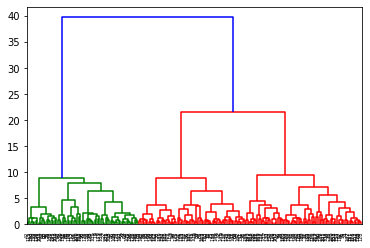

In [32]:
dend = dendrogram(wardlink)

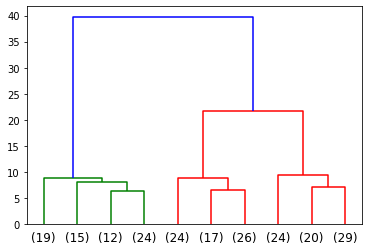

In [33]:
dend = dendrogram(wardlink,truncate_mode='lastp',p=10)

In [34]:
from scipy.cluster.hierarchy import fcluster

In [35]:
clusters = fcluster(wardlink,3,criterion='maxclust')

In [36]:
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [37]:
data2=pd.read_csv("bank_marketing_part1_Data.csv")

In [38]:
data2['clusters'] = clusters

In [39]:
data2.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [40]:
data2.clusters.value_counts().sort_index()

1    70
2    67
3    73
Name: clusters, dtype: int64

In [41]:
F_data = data2.groupby('clusters').mean()

In [42]:
F_data

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
clusters,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178


In [43]:
F_data['Freq']=data2.clusters.value_counts().sort_index()

In [44]:
F_data

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


### Aglomerative

In [45]:
from sklearn.cluster import AgglomerativeClustering

In [46]:
cluster1 = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='average')

In [47]:
Cluster_agglo = cluster1.fit_predict(data1)

In [48]:
Cluster_agglo

array([1, 0, 1, 2, 1, 0, 2, 2, 1, 2, 1, 1, 2, 1, 0, 0, 0, 2, 2, 2, 2, 2,
       1, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1,
       2, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 1, 0, 1,
       1, 0, 1, 2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 0, 0, 0, 0, 1, 2, 1, 1, 1,
       1, 0, 0, 1, 0, 2, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 1,
       1, 0, 1, 2, 2, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0,
       0, 1, 2, 1, 1, 2, 1, 0, 0, 0, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 1,
       0, 0, 2, 2, 0, 1, 1, 2, 1, 1, 1, 2, 1, 0, 0, 2, 0, 2, 0, 1, 1, 1,
       0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0, 2, 1, 0, 1, 1, 2,
       1, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1], dtype=int64)

In [49]:
data2=data2.drop('clusters',axis=1)

In [50]:
data2.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [51]:
data2['Agglo_Clust'] = Cluster_agglo

In [52]:
data2.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Agglo_Clust
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [53]:
data2.Agglo_Clust.value_counts().sort_index()

0    65
1    75
2    70
Name: Agglo_Clust, dtype: int64

In [54]:
F_data_agglo = data2.groupby('Agglo_Clust').mean()

In [55]:
F_data_agglo

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
Agglo_Clust,,,,,,,
0,14.217077,14.195846,0.884869,5.442000,3.253508,2.768418,5.055569
1,18.129200,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040
2,11.916857,13.291000,0.846766,5.258300,2.846000,4.619000,5.115071


In [57]:
F_data_agglo['Freq']=data2.Agglo_Clust.value_counts().sort_index()

In [58]:
F_data_agglo

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
Agglo_Clust,,,,,,,,
0,14.217077,14.195846,0.884869,5.442000,3.253508,2.768418,5.055569,65
1,18.129200,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,75
2,11.916857,13.291000,0.846766,5.258300,2.846000,4.619000,5.115071,70


### KMeans

In [59]:
from sklearn.cluster import KMeans

In [60]:
wss = []
for i in range(2,15):
    KM = KMeans(n_clusters = i)
    KM.fit(data1)
    wss.append(KM.inertia_)

In [61]:
wss

[659.1474009548498,
 430.2984817512229,
 370.86859623942064,
 327.2466104066807,
 289.3301990620039,
 261.5291433868515,
 239.73771353905983,
 224.66209868900282,
 205.52400698608244,
 189.08859866716801,
 182.68098901542672,
 173.35914170725138,
 161.10358649681578]

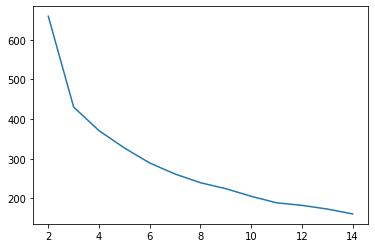

In [62]:
plt.plot(range(2,15),wss)

In [63]:
K_Means = KMeans(n_clusters=3)
K_Means.fit(data1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [64]:
labels = K_Means.labels_

In [65]:
labels

array([2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2,
       2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2,
       0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0,
       0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1,
       2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0])

In [66]:
data2=data2.drop('Agglo_Clust',axis=1)

In [67]:
data2.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [68]:
data2['K_Means'] = labels

In [69]:
data2.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,K_Means
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,2
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,2
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,2


In [70]:
from sklearn.metrics import silhouette_score,silhouette_samples

In [71]:
silhouette_score(data1,labels)

0.4008059221522216

In [72]:
sil_width=silhouette_samples(data1,labels)

In [73]:
sil_width

array([0.5732776 , 0.36556355, 0.63709249, 0.515595  , 0.36097201,
       0.22152508, 0.47529542, 0.36025848, 0.51938329, 0.53443903,
       0.46599399, 0.12839864, 0.39177784, 0.52379458, 0.11202082,
       0.22512083, 0.33760956, 0.5018087 , 0.03635503, 0.23801566,
       0.36177434, 0.3693663 , 0.43153403, 0.26364196, 0.47484293,
       0.06663956, 0.27151643, 0.50414367, 0.55487254, 0.43479958,
       0.37528473, 0.43006502, 0.39151526, 0.3943622 , 0.5362567 ,
       0.55717776, 0.50878421, 0.42617776, 0.50641159, 0.62170114,
       0.55929539, 0.48579454, 0.39864428, 0.61044051, 0.51398993,
       0.37791063, 0.30664315, 0.58154614, 0.48759463, 0.53302467,
       0.31693425, 0.49463828, 0.58531649, 0.59861082, 0.61892471,
       0.23370264, 0.44475373, 0.54060572, 0.57808265, 0.57623567,
       0.55297302, 0.51585343, 0.55579575, 0.27793624, 0.49524145,
       0.56405298, 0.57784591, 0.52274801, 0.6313322 , 0.08521853,
       0.44260057, 0.3237709 , 0.54096805, 0.5820664 , 0.29582

In [74]:
data2['sil_width']=sil_width

In [75]:
data2.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,K_Means,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,2,0.573278
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0,0.365564
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,2,0.637092
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,1,0.515595
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,2,0.360972


In [76]:
data2.K_Means.value_counts().sort_index()

0    71
1    72
2    67
Name: K_Means, dtype: int64

In [77]:
F_data_KM = data2.groupby('K_Means').mean()

In [78]:
F_data_KM

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,sil_width
K_Means,,,,,,,,
0,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,0.338593
1,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722,0.399556
2,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,0.468077


In [79]:
F_data_KM['freq']=data2.K_Means.value_counts().sort_index()

In [80]:
F_data_KM

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,sil_width,freq
K_Means,,,,,,,,,
0,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,0.338593,71
1,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722,0.399556,72
2,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,0.468077,67


# PROBLEM SET 2

### An insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, Random Forest and ANN and compare the models performance in train and test sets.

In [160]:
insurance_data = pd.read_csv('insurance_part2_data.csv')

In [161]:
insurance_data.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [162]:
insurance_data.shape

(3000, 10)

In [163]:
insurance_data.size

30000

In [164]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null int64
Agency_Code     3000 non-null object
Type            3000 non-null object
Claimed         3000 non-null object
Commision       3000 non-null float64
Channel         3000 non-null object
Duration        3000 non-null int64
Sales           3000 non-null float64
Product Name    3000 non-null object
Destination     3000 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [165]:
insurance_data.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

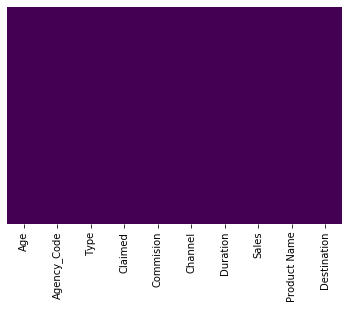

In [166]:
sns.heatmap(insurance_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [167]:
dups = insurance_data.duplicated()

In [168]:
dups.sum()

139

In [169]:
insurance_data.drop_duplicates(inplace=True)

In [170]:
insurance_data.shape

(2861, 10)

In [171]:
insurance_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2861.0,38.204124,10.678106,8.0,31.0,36.00,43.00,84.00
Commision,2861.0,15.080996,25.826834,0.0,0.0,5.63,17.82,210.21
Duration,2861.0,72.120238,135.977200,-1.0,12.0,28.00,66.00,4580.00
Sales,2861.0,61.757878,71.399740,0.0,20.0,33.50,69.30,539.00


In [172]:
insurance_data.cov()

,Age,Commision,Duration,Sales
Age,114.021955,17.859342,39.866707,27.589332
Commision,17.859342,667.025360,1622.878905,1405.483218
Duration,39.866707,1622.878905,18489.798825,5338.729640
Sales,27.589332,1405.483218,5338.729640,5097.922903


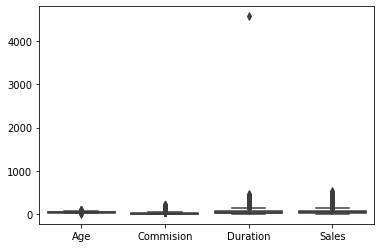

In [173]:
sns.boxplot(data=insurance_data)

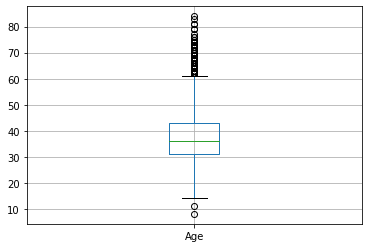

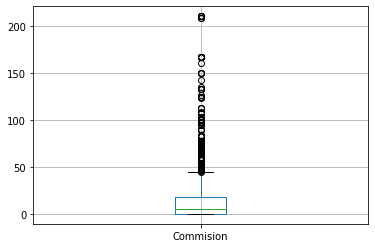

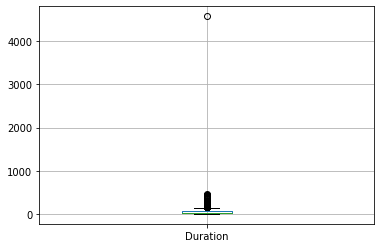

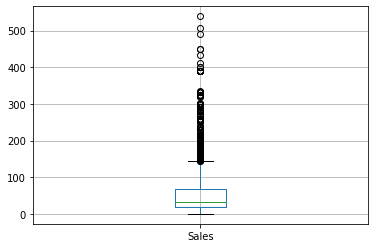

In [174]:
for col in ['Age','Commision','Duration','Sales']:
    insurance_data.boxplot(column=[col])
    plt.show()

In [175]:
def treat_outliers(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_value=Q1-(1.5*IQR)
    upper_value=Q3+(1.5*IQR)
    return lower_value,upper_value

In [176]:
for col in ['Age','Commision','Duration','Sales']:
    least,maximum=treat_outliers(insurance_data[col])
    insurance_data[col]=np.where(insurance_data[col]>maximum,maximum,insurance_data[col])
    insurance_data[col]=np.where(insurance_data[col]<least,least,insurance_data[col])

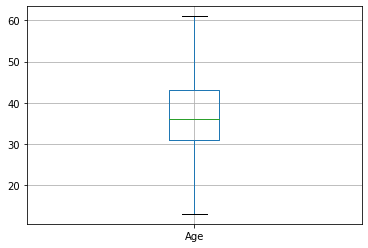

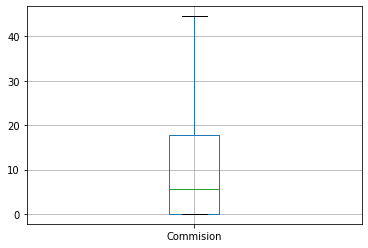

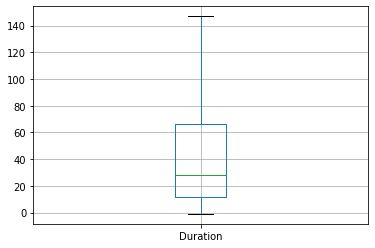

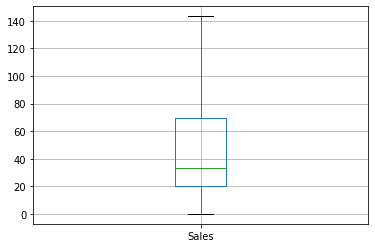

In [177]:
for col in ['Age','Commision','Duration','Sales']:
    insurance_data.boxplot(column=[col])
    plt.show()

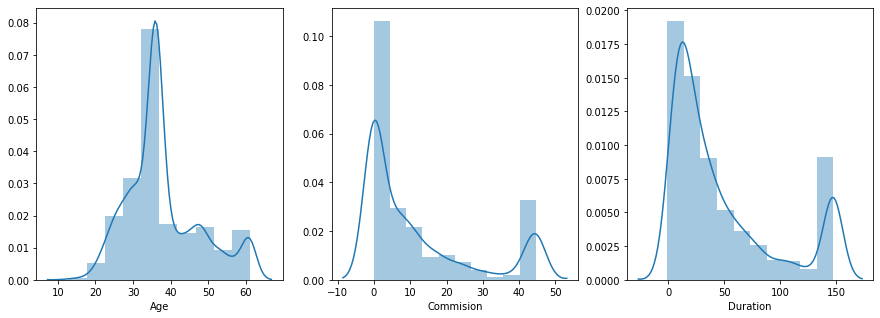

In [178]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.distplot(insurance_data.Age,bins=10)
plt.subplot(1,3,2)
sns.distplot(insurance_data.Commision,bins=10)
plt.subplot(1,3,3)
sns.distplot(insurance_data.Duration,bins=10)

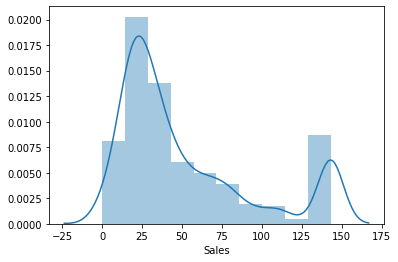

In [179]:
sns.distplot(insurance_data.Sales,bins=10)

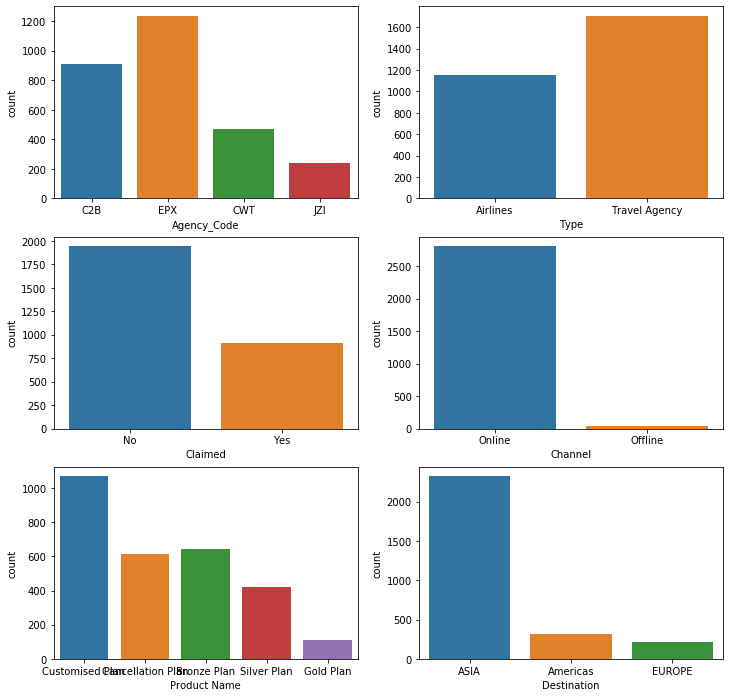

In [185]:
plt.figure(figsize=(12,12))
plt.subplot(3,2,1)
sns.countplot('Agency_Code',data=insurance_data)
plt.subplot(3,2,2)
sns.countplot('Type',data=insurance_data)
plt.subplot(3,2,3)
sns.countplot('Claimed',data=insurance_data)
plt.subplot(3,2,4)
sns.countplot('Channel',data=insurance_data)
plt.subplot(3,2,5)
sns.countplot('Product Name',data=insurance_data)
plt.subplot(3,2,6)
sns.countplot('Destination',data=insurance_data)

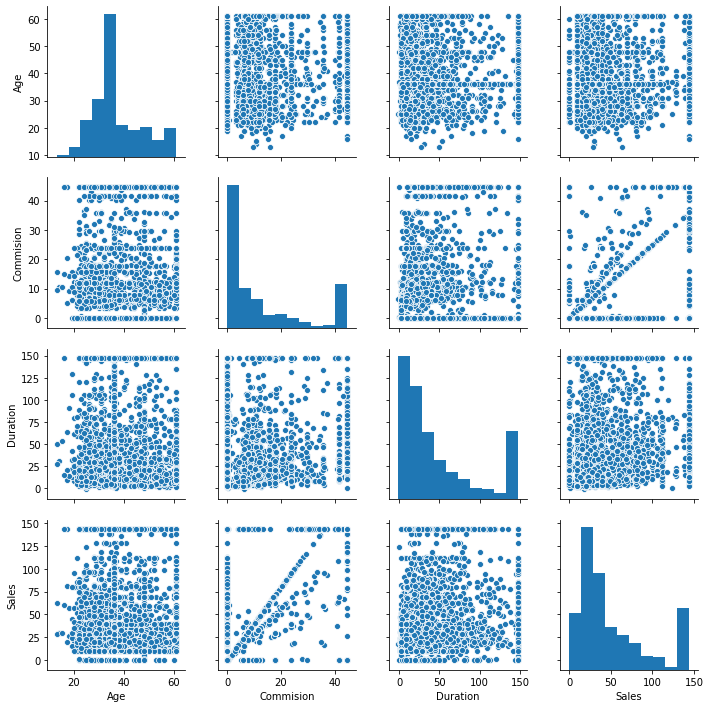

In [27]:
sns.pairplot(insurance_data)

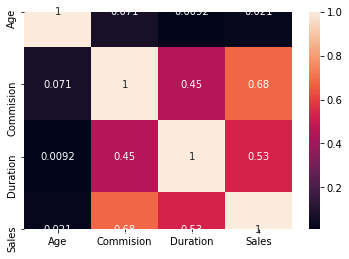

In [28]:
sns.heatmap(insurance_data.corr(),annot=True)

In [29]:
cols = ['Agency_Code','Type','Claimed','Channel','Product Name','Destination']
for i in cols:
    print(insurance_data[i].value_counts())
    print('  ')

EPX    1238
C2B     913
CWT     471
JZI     239
Name: Agency_Code, dtype: int64
  
Travel Agency    1709
Airlines         1152
Name: Type, dtype: int64
  
No     1947
Yes     914
Name: Claimed, dtype: int64
  
Online     2815
Offline      46
Name: Channel, dtype: int64
  
Customised Plan      1071
Bronze Plan           645
Cancellation Plan     615
Silver Plan           421
Gold Plan             109
Name: Product Name, dtype: int64
  
ASIA        2327
Americas     319
EUROPE       215
Name: Destination, dtype: int64
  


In [30]:
for feature in insurance_data.columns:
    if insurance_data[feature].dtype=='object':
        print('\n')
        print('feature',feature)
        print(pd.Categorical(insurance_data[feature].unique()))
        print(pd.Categorical(insurance_data[feature].unique()).codes)
        insurance_data[feature]=pd.Categorical(insurance_data[feature]).codes



feature Agency_Code
[C2B, EPX, CWT, JZI]
Categories (4, object): [C2B, CWT, EPX, JZI]
[0 2 1 3]


feature Type
[Airlines, Travel Agency]
Categories (2, object): [Airlines, Travel Agency]
[0 1]


feature Claimed
[No, Yes]
Categories (2, object): [No, Yes]
[0 1]


feature Channel
[Online, Offline]
Categories (2, object): [Offline, Online]
[1 0]


feature Product Name
[Customised Plan, Cancellation Plan, Bronze Plan, Silver Plan, Gold Plan]
Categories (5, object): [Bronze Plan, Cancellation Plan, Customised Plan, Gold Plan, Silver Plan]
[2 1 0 4 3]


feature Destination
[ASIA, Americas, EUROPE]
Categories (3, object): [ASIA, Americas, EUROPE]
[0 1 2]


In [31]:
insurance_data.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0,0,0.70,1,7.0,2.51,2,0
1,36.0,2,1,0,0.00,1,34.0,20.00,2,0
2,39.0,1,1,0,5.94,1,3.0,9.90,2,1
3,36.0,2,1,0,0.00,1,4.0,26.00,1,0
4,33.0,3,0,0,6.30,1,53.0,18.00,0,0


In [32]:
insurance_data.Claimed.value_counts(normalize=True)

0    0.680531
1    0.319469
Name: Claimed, dtype: float64

In [33]:
X=insurance_data.drop('Claimed',axis=1)

In [34]:
X.shape

(2861, 9)

In [35]:
Y=insurance_data.pop('Claimed')

In [36]:
Y.shape

(2861,)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,train_labels,test_labels=train_test_split(X,Y,test_size=0.30,random_state=1)

# DECISION TREE MODEL

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
decision_tree_model = DecisionTreeClassifier(criterion='gini')

In [41]:
decision_tree_model.fit(x_train,train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
param_grid = {'max_depth': [7,8,9,10],'min_samples_leaf': [15,20,25],'min_samples_split': [45,60,75]}

In [45]:
decision_tree_model = DecisionTreeClassifier()

In [46]:
grid_search=GridSearchCV(estimator=decision_tree_model,param_grid=param_grid,cv=3)

In [47]:
grid_search.fit(x_train,train_labels)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [7, 8, 9, 10],
                         'min_samples_leaf': [15, 20, 25],
                        

In [48]:
grid_search.best_params_

{'max_depth': 8, 'min_samples_leaf': 20, 'min_samples_split': 45}

In [49]:
best_grid=grid_search.best_estimator_

In [50]:
ytrain_predict=best_grid.predict(x_train)

In [51]:
ytest_predict=best_grid.predict(x_test)

In [52]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = x_train.columns))

                   Imp
Age           0.049193
Agency_Code   0.481977
Type          0.000000
Commision     0.056822
Channel       0.000000
Duration      0.094579
Sales         0.262730
Product Name  0.038013
Destination   0.016686


In [53]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score

In [54]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1359
           1       0.69      0.61      0.65       643

    accuracy                           0.79      2002
   macro avg       0.76      0.74      0.75      2002
weighted avg       0.78      0.79      0.78      2002



In [55]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       588
           1       0.62      0.55      0.59       271

    accuracy                           0.75       859
   macro avg       0.71      0.70      0.71       859
weighted avg       0.75      0.75      0.75       859



In [56]:
print(confusion_matrix(train_labels,ytrain_predict))

[[1183  176]
 [ 251  392]]


In [57]:
print(confusion_matrix(test_labels,ytest_predict))

[[498  90]
 [121 150]]


In [58]:
best_grid.score(x_train,train_labels)

0.7867132867132867

In [59]:
best_grid.score(x_test,test_labels)

0.7543655413271245

AUC: 0.847


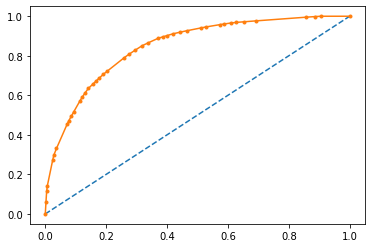

In [60]:
probs = best_grid.predict_proba(x_train)
probs = probs[:,1]
auc = roc_auc_score(train_labels,probs)
print('AUC: %.3f'%auc)
fpr,tpr,thresholds = roc_curve(train_labels,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.770


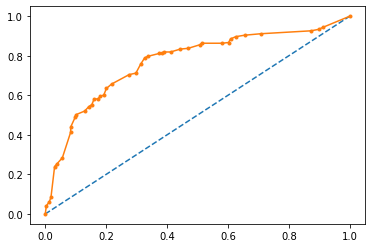

In [61]:
probs = best_grid.predict_proba(x_test)
probs = probs[:,1]
auc = roc_auc_score(test_labels,probs)
print('AUC: %.3f'%auc)
fpr,tpr,thresholds = roc_curve(test_labels,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# RANDOM FOREST

In [133]:
from sklearn.ensemble import RandomForestClassifier

In [138]:
param_grid={'max_depth':[7,8],'max_features':[7,8,9],'min_samples_leaf':[20,25],'min_samples_split':[60,75],
            'n_estimators':[101,301]}

In [139]:
random_forest_model = RandomForestClassifier()

In [140]:
grid_search=GridSearchCV(estimator=random_forest_model,param_grid=param_grid,cv=3)

In [141]:
grid_search.fit(x_train,train_labels)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [142]:
grid_search.best_params_

{'max_depth': 8,
 'max_features': 7,
 'min_samples_leaf': 20,
 'min_samples_split': 60,
 'n_estimators': 301}

In [143]:
best_grid=grid_search.best_estimator_

In [144]:
ytrain_predict=best_grid.predict(x_train)

In [145]:
ytest_predict=best_grid.predict(x_test)

In [146]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1359
           1       0.73      0.59      0.65       643

    accuracy                           0.80      2002
   macro avg       0.77      0.74      0.76      2002
weighted avg       0.79      0.80      0.79      2002



In [147]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       588
           1       0.68      0.58      0.63       271

    accuracy                           0.78       859
   macro avg       0.75      0.73      0.74       859
weighted avg       0.78      0.78      0.78       859



In [148]:
print(confusion_matrix(train_labels,ytrain_predict))

[[1215  144]
 [ 261  382]]


In [149]:
print(confusion_matrix(test_labels,ytest_predict))

[[516  72]
 [115 156]]


In [150]:
best_grid.score(x_train,train_labels)

0.7977022977022977

In [151]:
best_grid.score(x_test,test_labels)

0.7823050058207218

AUC: 0.848


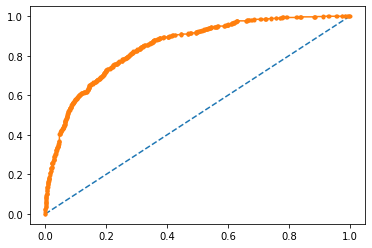

In [152]:
probs = best_grid.predict_proba(x_train)
probs = probs[:,1]
auc = roc_auc_score(train_labels,probs)
print('AUC: %.3f'%auc)
fpr,tpr,thresholds = roc_curve(train_labels,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.814


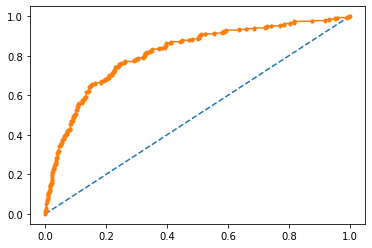

In [153]:
probs = best_grid.predict_proba(x_test)
probs = probs[:,1]
auc = roc_auc_score(test_labels,probs)
print('AUC: %.3f'%auc)
fpr,tpr,thresholds = roc_curve(test_labels,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# ANN MODEL

In [79]:
from sklearn.neural_network import MLPClassifier

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
scaler = StandardScaler()

In [82]:
sc_x_train = scaler.fit_transform(x_train)

In [83]:
sc_x_test = scaler.transform(x_test)

In [84]:
param_grid = {'hidden_layer_sizes': [(100,100,100)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.1,0.01],
    'max_iter' : [10000]
}

In [85]:
ann_model = MLPClassifier()

In [86]:
grid_search=GridSearchCV(estimator=ann_model,param_grid=param_grid,cv=3)

In [87]:
grid_search.fit(sc_x_train,train_labels)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'activation': ['logistic', 'relu'],
     

In [88]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100, 100, 100),
 'max_iter': 10000,
 'solver': 'adam',
 'tol': 0.01}

In [89]:
best_grid = grid_search.best_estimator_

In [90]:
ytrain_predict = best_grid.predict(sc_x_train)

In [91]:
ytest_predict = best_grid.predict(sc_x_test)

In [92]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1359
           1       0.66      0.58      0.62       643

    accuracy                           0.77      2002
   macro avg       0.74      0.72      0.73      2002
weighted avg       0.76      0.77      0.77      2002



In [93]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       588
           1       0.63      0.56      0.59       271

    accuracy                           0.76       859
   macro avg       0.72      0.70      0.71       859
weighted avg       0.75      0.76      0.75       859



In [94]:
print(confusion_matrix(train_labels,ytrain_predict))

[[1166  193]
 [ 268  375]]


In [95]:
print(confusion_matrix(test_labels,ytest_predict))

[[501  87]
 [120 151]]


In [96]:
best_grid.score(sc_x_train,train_labels)

0.7697302697302697

In [97]:
best_grid.score(sc_x_test,test_labels)

0.7590221187427241

AUC: 0.810


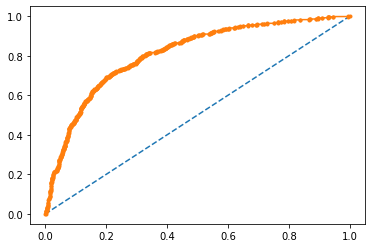

In [98]:
probs = best_grid.predict_proba(sc_x_train)
probs = probs[:,1]
auc = roc_auc_score(train_labels,probs)
print('AUC: %.3f'%auc)
fpr,tpr,thresholds = roc_curve(train_labels,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.800


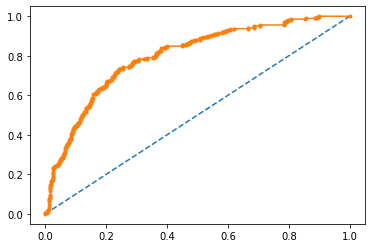

In [99]:
probs = best_grid.predict_proba(sc_x_test)
probs = probs[:,1]
auc = roc_auc_score(test_labels,probs)
print('AUC: %.3f'%auc)
fpr,tpr,thresholds = roc_curve(test_labels,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()